11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training with Adam optimizer...



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8796 - loss: 0.4293 - val_accuracy: 0.9562 - val_loss: 0.1487
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9644 - loss: 0.1219 - val_accuracy: 0.9704 - val_loss: 0.0973
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9768 - loss: 0.0804 - val_accuracy: 0.9742 - val_loss: 0.0885
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9828 - loss: 0.0572 - val_accuracy: 0.9760 - val_loss: 0.0860
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9865 - loss: 0.0427 - val_accuracy: 0.9752 - val_loss: 0.0862
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9903 - loss: 0.0331 - val_accuracy: 0.9762 - val_loss: 0.0815
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9925 - loss: 0.0264 - val_accuracy: 0.9782 - val_loss: 0.0756
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9917 - loss: 0.0

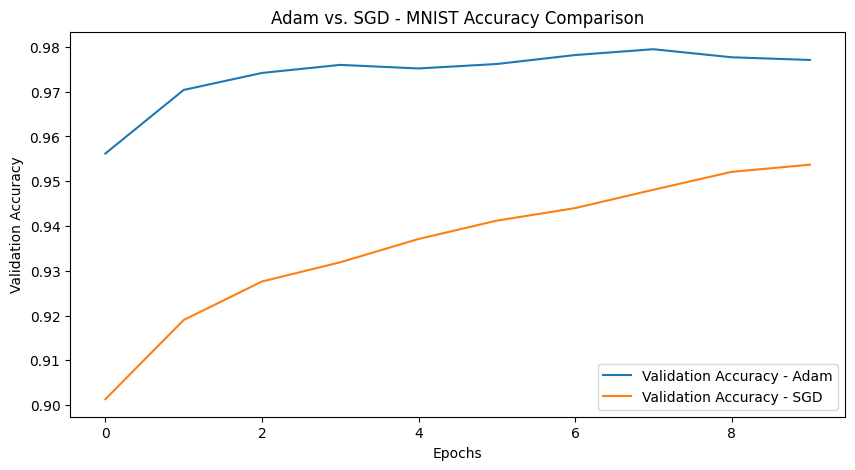

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Step 1: Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0-255 -> 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Step 2: Define a simple neural network model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),  # Input layer
        tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer
        tf.keras.layers.Dense(10, activation='softmax') # Output layer
    ])
    return model

# Step 3: Compile and train models with different optimizers
optimizers = {'Adam': tf.keras.optimizers.Adam(), 'SGD': tf.keras.optimizers.SGD()}
histories = {}

for opt_name, optimizer in optimizers.items():
    print(f"\nTraining with {opt_name} optimizer...\n")
    model = create_model()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)
    histories[opt_name] = history

# Step 4: Plot accuracy comparison
plt.figure(figsize=(10, 5))

for opt_name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy - {opt_name}')

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Adam vs. SGD - MNIST Accuracy Comparison")
plt.legend()
plt.show()
